# Stock Price Prediction Using Multiple Algorithms

##Introduction:


*  This project was done in order to complete the academic project of Security Engineering for AI.

##Project workflow
The workflow for this project is essentially in these steps:
*  Linear Regression
*  KNN
*  LSTM (Deep Learning)




#1- Problem Understanding
###What are Stocks?
*  Stock represents a claim on the company's assets and earnings. As you acquire more stock, your ownership stake in the company becomes greater.” 

###What is stock price prediction? 

*  Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit. 
*  Stock market analysis is divided into two parts:
      1.   Fundamental analysis : involves analyzing a company’s financial statements to determine the fair value of the business 
      2.   Technical analysis : assumes that a security’s price already reflects all publicly-available information and instead focuses on the statistical analysis of price movements.


We will use dataset from Quandl (A website where you can find historical data of stocks) mainly the (TATAGLOBAL) stock.




In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
import quandl
df = quandl.get("NSE/TATAGLOBAL", authtoken="WuwsYYzjWT_ogDGgRpSS")

#print the head
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
...,...,...,...,...,...,...,...
2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31


###Time to dive in !!
Let's load dataset and packages ! 

###We notice that there are many variables in our dataset :


*   Open & Close : represents the starting and the final price of the stock in a day.
*   Low & High & Last : represent the Low , High prices of the stock during the day & the last price of the share of the day.
*  Total Trade Quantity : represent the number of shares sold.
*  Turnover (Lacs) : represent the turnover of the company.

Let's now plot the y variable (Close) to see how is the shape of it.

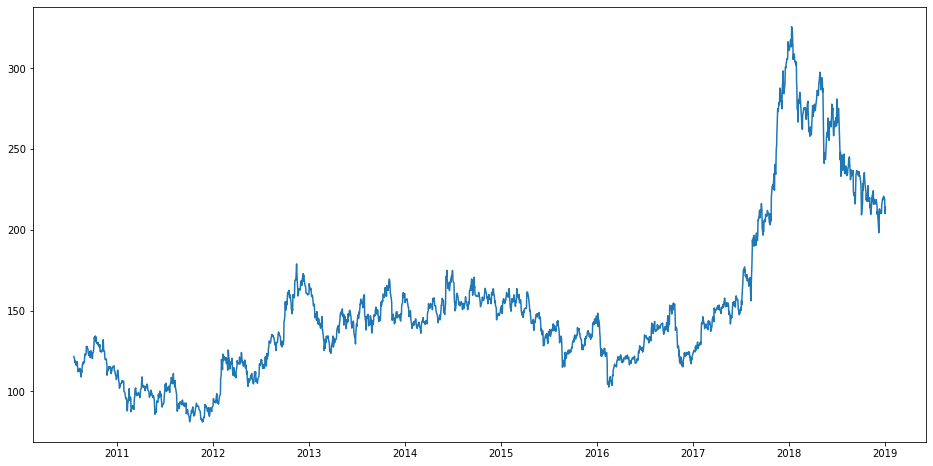

In [2]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

#Linear Regression

###Introduction : 
Let's start by the most basic algorithm that can be implimented on this usecase.

*  Linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 


###Implementation :

We will first sort the dataset in ascending order and then create a separate dataset so that any new feature created does not affect the original data.



In [3]:
#setting index as date values
df['Date'] = pd.to_datetime(df.index.values,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
new_data['Date'] = data['Date'].values
new_data['Close'] = data['Close'].values

new_data.head()

,Date,Close
0,2010-07-21,121.55
1,2010-07-22,120.90
2,2010-07-23,120.65
3,2010-07-26,117.60
4,2010-07-27,118.65


In [4]:
from fastai.tabular.all import  *
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,121.55,2010,7,29,21,2,202,False,False,False,False,False,False
1,120.90,2010,7,29,22,3,203,False,False,False,False,False,False
2,120.65,2010,7,29,23,4,204,False,False,False,False,False,False
3,117.60,2010,7,30,26,0,207,False,False,False,False,False,False
4,118.65,2010,7,30,27,1,208,False,False,False,False,False,False


*  The add_datepart creates features based on the date variable.

*   I guess that the first and last day of the week affect the changement of stock's price more than normal days do!

*  So let's create a new column which will contain the value 1 if its Monday or Friday and the value of 0 if not.

In [5]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data.loc[i,['mon_fri']] = 1
        
    else:
        new_data.loc[i,['mon_fri']] = 0
new_data

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,121.55,2010,7,29,21,2,202,False,False,False,False,False,False,0
1,120.90,2010,7,29,22,3,203,False,False,False,False,False,False,0
2,120.65,2010,7,29,23,4,204,False,False,False,False,False,False,1
3,117.60,2010,7,30,26,0,207,False,False,False,False,False,False,1
4,118.65,2010,7,30,27,1,208,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,219.40,2018,12,1,31,0,365,True,False,True,False,True,False,1
2096,219.10,2019,1,1,1,1,1,False,True,False,True,False,True,0
2097,214.60,2019,1,1,2,2,2,False,False,False,False,False,False,0
2098,210.05,2019,1,1,3,3,3,False,False,False,False,False,False,0


If the day of the week is equal to 0 or 4 , the mon_fri variable will set to 1 (True) other wise it will be set as a 0.

We will now split the data into train and test set and then build our model.

*   The Train set will be for training our model.
*   The Test set will be for validation our model & Calculating its accuracy.

In [6]:
#split into train and validation
train = new_data.iloc[:987]
valid = new_data.iloc[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)


0.6031076247858824

###Results

Let's now calculate the RMSE to check the accuracy of our model

In [7]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

49.19923499727175

The RMSE (root mean square error) value is high, which clearly shows that linear regression has performed poorly and we can not count on this model. 
###Let’s look at the plot and understand why linear regression has not done well:


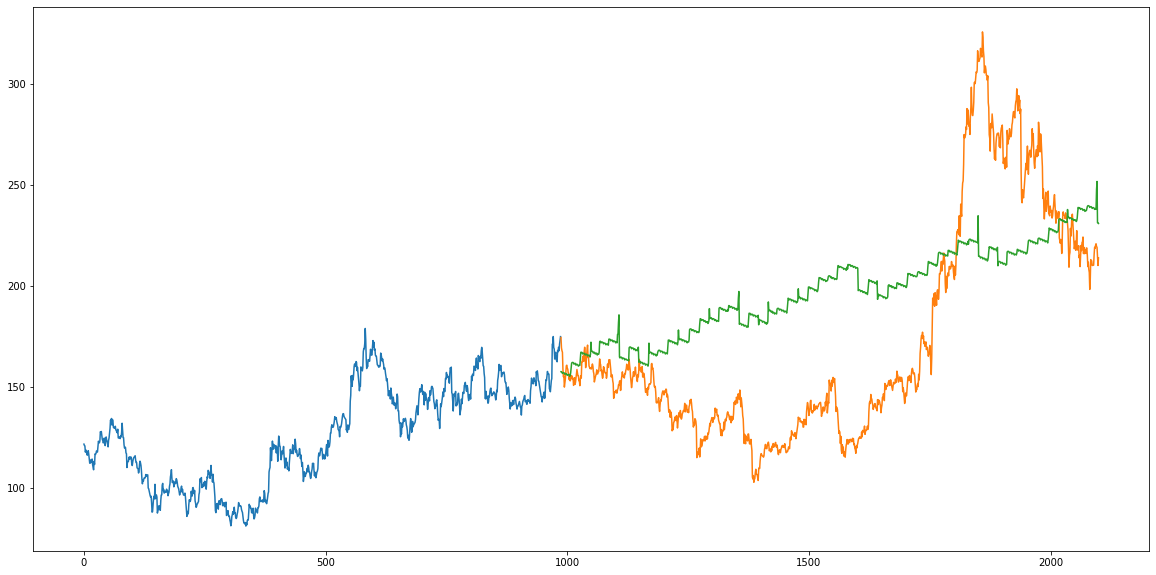

In [8]:
#valid['Predictions'] = 0
# valid['Predictions'] = preds


#plot
valids = []
data = valid.to_dict(orient='records')
for i in range(0, len(data)):
    data[i]['Predictions'] = preds[i]
    valids.append(data[i])
valid = pd.DataFrame(valids)

valid.index = new_data[987:].index
train.index = new_data[:987].index
    
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

###Conclusion
In fact, Linear Regression that can be implemented quickly, But it has a few cons, which are affecting forecasting problems, since the model overfits the date column and not taking in consideration the last predicted point.

#k-Nearest Neighbours Regression

###Introduction : 
Let's now dive in with another known algorithm 
*  the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression In both cases, the input consists of the k closest training examples in the feature space. 


###Implementation :

We will use the same dataset (train and validation)

In [9]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 

In [10]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

###Result

In [11]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

66.79245783912562

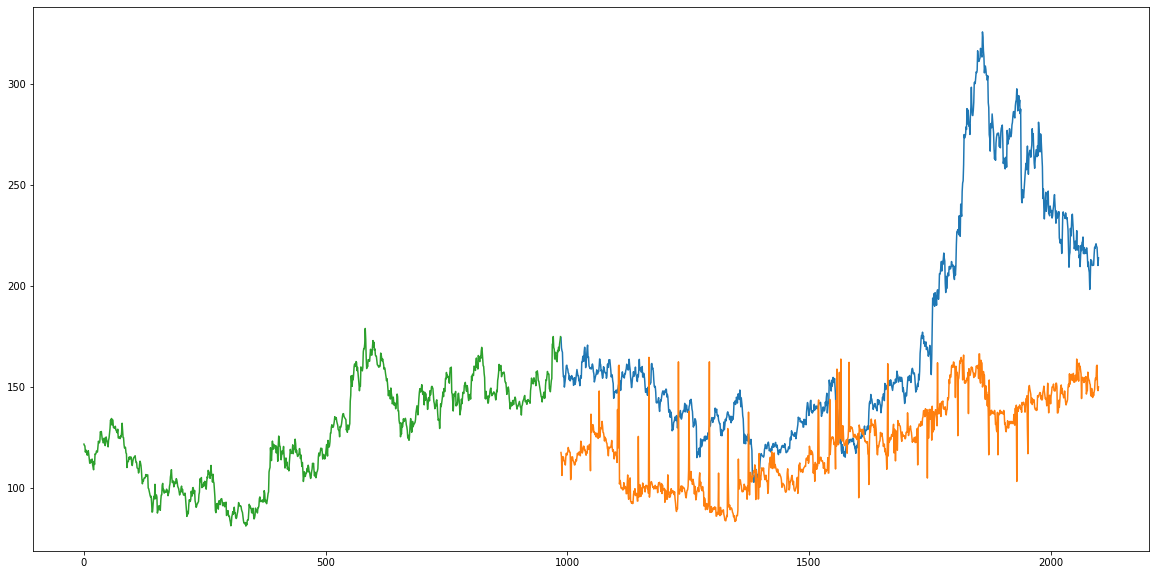

In [12]:
# valid['Predictions'] = 0
# valid['Predictions'] = preds


#plot
validate = []
datas = valid.to_dict(orient='records')
for i in range(0, len(datas)):
    datas[i]['Predictions'] = preds[i]
    validate.append(datas[i])
    
valid = pd.DataFrame(validate)

valid.index = new_data[987:].index
train.index = new_data[:987].index

valid

plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

#Long Short Term Memory (LSTM) - RNN

###Introduction : 
We are having a timeseries based data set, particulary LSTM, because the model will be based on both past and present info.

*  Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. 
*  LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

LSTM has three gates:



1.   The input gate: The input gate adds information to the cell state
2.   The forget gate: It removes the information that is no longer required by the model
3.   The output gate: Output Gate at LSTM selects the information to be shown as output








###Implementation :

For now, let us implement LSTM and check it’s performance on our particular data.


In [13]:

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
new_data['Date'] = data['Date'].values
new_data['Close'] = data['Close'].values

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


Now we the data is well prepared, Let's create the model

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
print(closing_price[0][0])

927/927 - 39s - loss: 0.0010 - 39s/epoch - 43ms/step
168.26068


###Result

In [15]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)


8.138688625163402


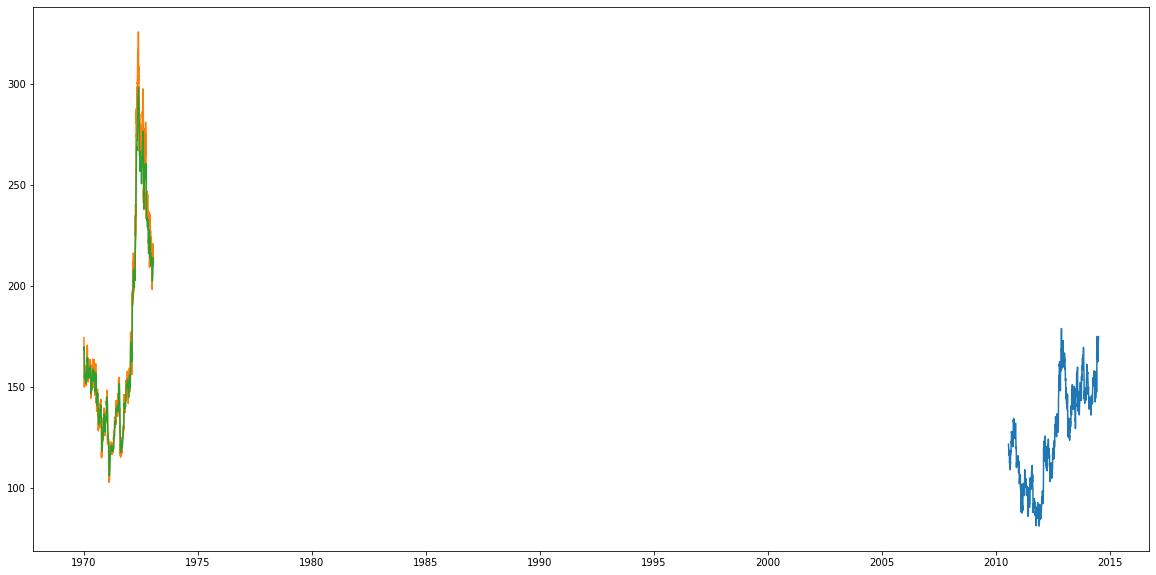

In [16]:
#for plotting
train = new_data[:987]
valid = new_data[987:]

val = []
datas = valid.to_dict(orient='records')
for i in range(0, len(datas)):
    datas[i]['Predictions'] = closing_price[i][0]
    val.append(datas[i])


valid = pd.DataFrame(val)
# valid
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


#General Conclusion
Working with time series datasets since most of machine learning algorithms are not smart to detect the overfit on the Date column during the model training.

Thus, LSTM is a good choice to be used especially when dealing with this kind of problems.